<a href="https://colab.research.google.com/github/benn1S/MachineLearning/blob/main/Assignment1_M%C3%BCcke_Breljak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 01 - Machine Learning WiSe 20/21

Jonas Mücke & Bernard Breljak

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# please use your correct directory path

path_to_train = '/content/drive/My Drive/Colab Notebooks/ML_Class_2020/KNN/zip.train'
path_to_test = '/content/drive/My Drive/Colab Notebooks/ML_Class_2020/KNN/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0].astype('int64')
X_test, y_test = test_data[:,1:], test_data[:,0].astype('int64')

In [4]:
y_train.dtype

dtype('int64')

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_train[0].reshape(16,16))

(7291, 256)
(7291,)
[[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.631  0.862 -0.167
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.992  0.297  1.     0.307
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -1.    -0.41   1.     0.986 -0.565
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -1.    -0.683  0.825  1.     0.562 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.    -0.938  0.54   1.     0.778 -0.715 -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -1.     0.1    1.     0.922 -0.439 -1.    -1.
  -1.    -1.    -1.    -1.    -1.    -1.   ]
 [-1.    -1.    -1.    -0.257  0.95   1.    -0.162 -1.    -1.    -1.
  -0.987 -0.714 -0.832 -1.    -1.    -1.   ]
 [-1.    -1.    -0.797  0.909  1.     0.3   -0.961 -1.    -1.    -0.55
   0.485  0.996  0.867  0.092 -1.    -1.   ]
 [-1.    -1.     0.278  1.     0.877 -0.824 -1.    -0.905

In [6]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img =(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')

def show_number(num):
  fig = plt.figure(figsize=(0.5,0.5))
  img =(1-num.reshape((16, 16)))/2*255
  plt.imshow(img, cmap='gray')
  plt.axis('off')

  

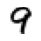

In [7]:
show_number(X_test[0])

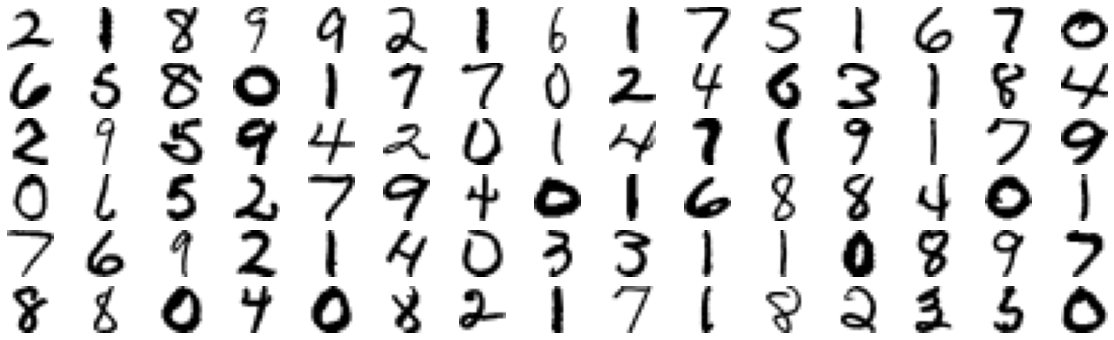

In [8]:
show_numbers(X_train)

# (1) Implementation of a k-NN-Classifier

In [9]:
class KNearestNeighbors():
    
    def euclidean_distance(self, x_1, x_2):
      return np.sum((x_1-x_2)**2, axis = 1)

    def nearest_neighbors(self, distances, k):
      return np.argpartition(distances, k)[:k]

    def label_max_occurences(self, neighbors, labels):
      return np.bincount(labels[neighbors]).argmax()

    def accuracy(self, test, labels): 
      return (test == labels).mean()


    def knn(self, distances, labels, k): 
      return (self.label_max_occurences(self.nearest_neighbors(distances, k), labels))

    def benchmark(self, train, test, labels_train, labels_test):
      
      knn_results = np.zeros(len(train)+1)
      result_list = np.empty((len(train)+1, len(test)))
      for image in range(len(test)):
        distances = self.euclidean_distance(train, test[image])

        for k in range(1,100):
          result = self.knn(distances, labels_train, k)
          result_list[k][image]=result
       
      for k in range(1, len(train)):
        knn_results[k] = self.accuracy(np.array(result_list[k]), labels_test)
      return (knn_results, result_list)

kNN = KNearestNeighbors()


In [10]:
accuracy, results = kNN.benchmark(X_train, X_test, y_train, y_test)

In [11]:
accuracy[3]

0.9446935724962631

(b) Using Matplotlib, plot some of the numbers that are classified incorrectly

In [12]:
def show_wrongly_classified(img_list):
    for e in range(len(img_list)):
      fig = plt.figure(figsize=(20, 6))
      ax = plt.subplot(6, 15, 1)
      img =(2-img_list[e].reshape((16, 16)))/2*255
      plt.imshow(img, cmap='gray')
      plt.axis('off')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


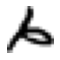

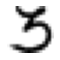

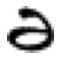

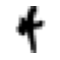

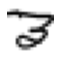

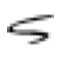

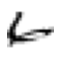

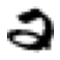

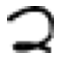

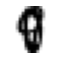

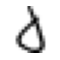

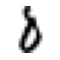

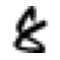

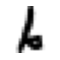

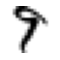

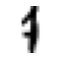

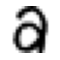

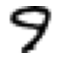

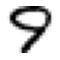

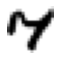

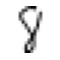

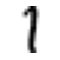

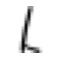

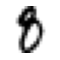

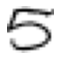

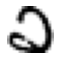

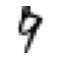

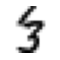

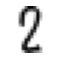

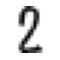

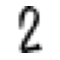

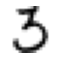

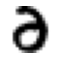

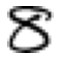

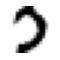

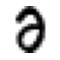

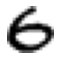

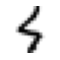

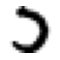

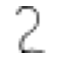

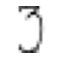

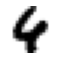

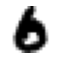

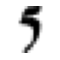

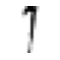

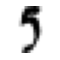

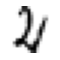

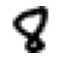

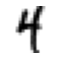

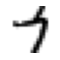

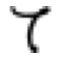

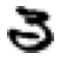

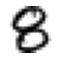

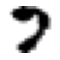

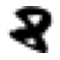

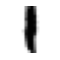

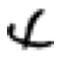

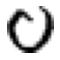

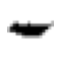

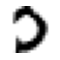

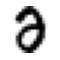

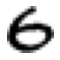

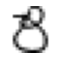

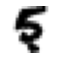

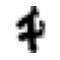

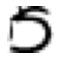

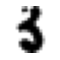

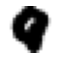

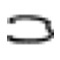

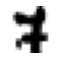

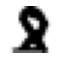

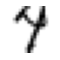

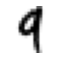

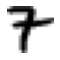

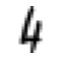

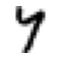

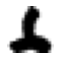

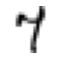

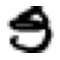

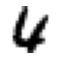

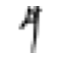

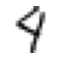

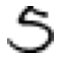

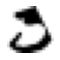

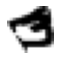

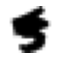

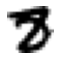

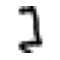

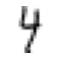

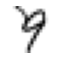

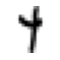

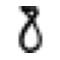

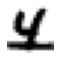

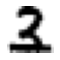

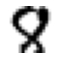

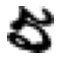

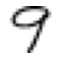

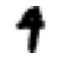

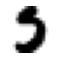

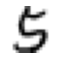

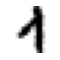

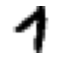

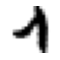

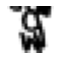

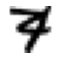

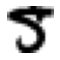

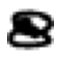

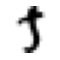

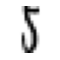

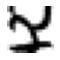

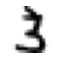

In [13]:
wrong=X_test[(results[3]== y_test) == False]
show_wrongly_classified(wrong)

(c) Which k is optimal for the accuracy?


(0.0, 100.0)

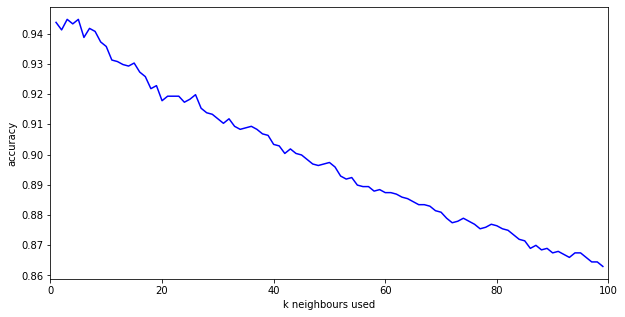

In [14]:
f, ax = plt.subplots(1, figsize = (10,5))
plt.ylabel('accuracy')
plt.xlabel('k neighbours used')
ax.plot( range(1,len(accuracy[:100])), accuracy[1:100], 'b', label = 'avrg Validation loss')
axes = plt.gca()
#axes.set_ylim([0.6,1])
axes.set_xlim([0,len(accuracy[:100])])

In [15]:
accuracy[:10]

array([0.        , 0.94369706, 0.94120578, 0.94469357, 0.9431988 ,
       0.94469357, 0.9387145 , 0.94170404, 0.94070752, 0.93721973])

Optimal Accuracy is with a k=3 and k=5.


# (d) What are advantages and disadvantages for the k-NN-Classifier?

Advantages:
+ simple algorithm, straight-forward implementation
+ works both for classification and regression problems
+ only one hyperparameter
+ non-parametric, no assumptions

Disadvantages:
- slow for big datasets and high-dimensional data
- curse of dimensionality: bad for high-dimensional data
- distance metric: be aware of feature scales
- how to choose k?